In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
from numpy.polynomial import Polynomial


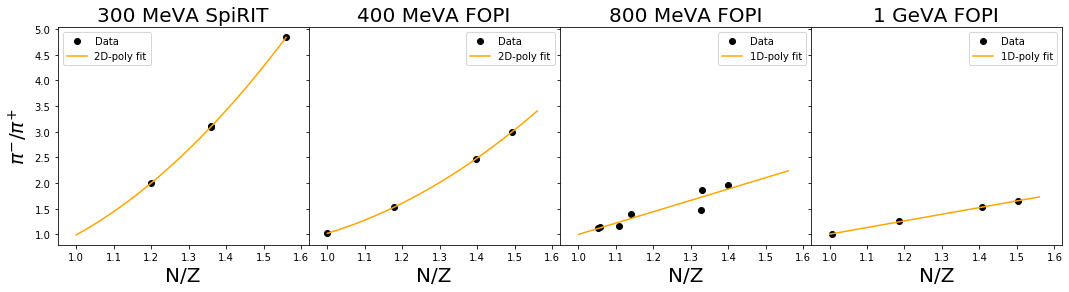

In [3]:
#Data points from measured data

#spirit data
x_300 = [1.2,1.36,1.36,1.56]
y_300 = [2,3.09,3.11,4.84]

#FOPI data
x_400 = [1,1.179,1.398,1.493]
y_400 = [1.02,1.536,2.474,3]

x_800 = [1.053,1.0564,1.1089,1.1409,1.327,1.3285,1.399]
y_800 = [1.1189,1.144,1.1659,1.3977,1.4759,1.8643,1.958]

x_1000 = [1.006,1.186,1.408,1.502]
y_1000 = [1, 1.266,1.527,1.652]


#Extrapolated points from fit FOPI
ex_400 = [1.56]
ey_400 = [3.08]

ex_800 = [1.56]
ey_800 = [2.1255]

ex_1000 = [1.56]
ey_1000 = [1.721]




#Polynomial fits
t = np.linspace(1,1.56,1000)
p_300  = np.poly1d(np.polyfit(x_300,y_300,2))
p_400  = np.poly1d(np.polyfit(x_400,y_400,2))
p_800  = np.poly1d(np.polyfit(x_800,y_800,1))
p_1000 = np.poly1d(np.polyfit(x_1000,y_1000,1))


fig, axs = plt.subplots(1,4, sharey=True,
                        gridspec_kw={'wspace': 0})

fig.set_size_inches(18, 4)

ax1,ax2,ax3,ax4 = axs

#plot data
ax1.plot(x_300, y_300,'o', color='black', label='Data')
ax2.plot(x_400, y_400,'o', color='black', label='Data')
ax3.plot(x_800, y_800,'o', color='black', label='Data')
ax4.plot(x_1000, y_1000,'o', color='black', label='Data')

#plot extrapolated data
#ax2.plot(ex_400, ey_400,'o', color='red', label='N/Z = 1.56 point')
#ax3.plot(ex_800, ey_800,'o', color='red', label='N/Z = 1.56 point')
#ax4.plot(ex_1000, ey_1000,'o', color='red', label='N/Z = 1.56 point')

#plot polynomials
ax1.plot(t,p_300(t), color='orange', label='2D-poly fit')
ax2.plot(t,p_400(t), color='orange', label='2D-poly fit')
ax3.plot(t,p_800(t), color='orange', label='1D-poly fit')
ax4.plot(t,p_1000(t), color='orange', label='1D-poly fit')



#fig.suptitle(r'$\pi^{-} / \pi^{+}$')

ax1.set_title("300 MeVA SpiRIT",fontsize =20)
ax2.set_title("400 MeVA FOPI", fontsize =20)
ax3.set_title("800 MeVA FOPI", fontsize =20)
ax4.set_title("1 GeVA FOPI", fontsize =20)

ax1.set_ylabel(r'$\pi^{-} / \pi^{+}$',fontsize=20)
ax1.set_xlabel('N/Z', fontsize =20)
ax2.set_xlabel('N/Z', fontsize =20)
ax3.set_xlabel('N/Z', fontsize =20)
ax4.set_xlabel('N/Z', fontsize =20)

ax1.set_xlim(.95,1.62)
ax1.set_xlim(.95,1.62)
ax2.set_xlim(.95,1.62)
ax3.set_xlim(.95,1.62)
ax4.set_xlim(.95,1.62)

leg1 = ax1.legend();
leg2 = ax2.legend();
leg3 = ax3.legend();
leg4 = ax4.legend();

plt.savefig('NZdep.png')

4.217981627062494
[4.217981627062504, 4.204375234717138, 4.231588019407864, 4.217981627062499]
0.871483807244318


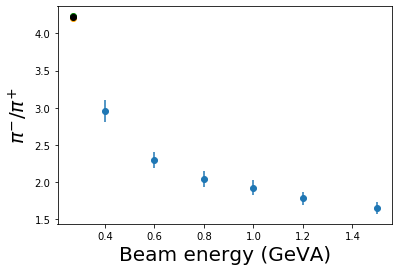

In [5]:
#extrapolated point for SpiRIT
nz_au = 1.49367
nz_sn108 = 1.2
nz_sn112 = 1.36 #same as 124 inverse reaction
nz_sn132 = 1.56

print(p_300(nz_au))

scale_108 = p_300(nz_au)/p_300(nz_sn108)
scale_112 = p_300(nz_au)/p_300(nz_sn112)
scale_132 = p_300(nz_au)/p_300(nz_sn132)

#scale the SpiRIT data by the fitted scale factor to plot on N/Z=1.49 FOPI data set

y_300_scale = [y_300[0]*scale_108, y_300[1]*scale_112, y_300[2]*scale_112, y_300[3]*scale_132]
print(y_300_scale)

#pi-/pi+ ratio data FOPI
fopi_x = [.4,.6,.8,1,1.2,1.5]
fopi_y = [2.96,2.3,2.04,1.92,1.78,1.65]
fopi_ey = [.15,.11,.11,.1,.09,.08]

fig, ax = plt.subplots()
plt.errorbar(fopi_x,fopi_y, yerr=fopi_ey, fmt='o')

ax.plot(.27,y_300[0]*scale_108,'o', color='blue', label='108 Sn')
ax.plot(.27,y_300[1]*scale_112,'o', color='orange', label='112 Sn')
ax.plot(.27,y_300[2]*scale_112,'o', color='green', label='124 Sn') #same as 112
ax.plot(.27,y_300[3]*scale_132,'o', color='black', label='132 Sn')

print(scale_132)

ax.set_xlabel('Beam energy (GeVA)', fontsize=20)
ax.set_ylabel(r'$\pi^{-} / \pi^{+}$', fontsize=20)

plt.savefig('piRatio_allsys.png')